# 영화 평점에 영향을 주는 요인들
    #성인물이평점이높을까 #경력감독vs신입감독 #감독평판 #복합장르vs단순장르 #개봉지역수 #박스오피스
    #영상이길면평점이높을까 #출연배우가많으면평점이높을까 #우리는하나조


## About IMDb
인터넷 영화 데이터베이스(Internet Movie Database, 약칭 IMDb)는 영화, 배우, 텔레비전 드라마, 비디오 게임 등에 관한 정보를 제공하는 온라인 데이터베이스이다. 2014년 8월 1일을 기준으로 영화, 에피소드 정보 2,950,317건, 인물 정보 6,029,621건을 소유하고 있으며, 컴퓨터 프로그래머 콜 니덤이 1990년에 제작했다. 1996년에는 영국에 인터넷 '무비 데이터베이스 Ltd' 회사를 설립해 광고 대행, 라이선싱, 파트너십 등을 통해 수익을 창출했다. 1998년에 아마존닷컴의 자회사로 들어가, DVD, 비디오 테이프를 판매하는 데 정보를 제공하고 있다.

이용자가 내용 추가, 수정을 요청할 수 있으며 운영진의 확인 후에 실제 데이터에 적용된다. 또한 이용자가 1~10점 사이로 별점을 줄 수 있다. 총점은 가중 산술 평균 방식을 통해 결정된다.

출처: 인터넷 영화 데이터베이스 위키 검색
https://ko.wikipedia.org/wiki/%EC%9D%B8%ED%84%B0%EB%84%B7_%EC%98%81%ED%99%94_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B2%A0%EC%9D%B4%EC%8A%A4

<img src="https://m.media-amazon.com/images/G/01/IMDb/BG_rectangle._CB1509060989_SY230_SX307_AL_.png">

## 분석 동기 및 이유
방송사가 콘텐츠를 독점하던 시대에서 OTT를 통해 소비가 가능해진 시대로 넘어오며, 채널의 경쟁력은 미디어 콘텐츠 그 자체가 되었다. 미디어라는 관심사로 모인 사람들끼리, 유저의 높은 평점을 이끌어낼 수 있는 요소들을 분석하고자 한다.

분석 주제 및 가설: 각 영화 제작 및 리뷰 관련 데이터가 IMDb의 평점에 어떠한 영향을 미치는가

이에 관련된 최대의 유저 데이터를 확보한 IMDb 사이트를 사용하지 않을 수 없었다.

https://datasets.imdbws.com/

IMDb는 비상업적인 목적이라면 데이터를 활용할 수 있는 페이지와 자료를 제공하고 있었다.


## 데이터를 바로 불러보자!
IMDb는 데이터 제공 사이트를 통해 매일 업데이트된 자료를 제공하고 있다.
총 7가지의 자료가 있었고, 이를 재가공하여 우리가 원하는 목적에 맞게 사용할 수 있다.
https://www.imdb.com/interfaces/

지금부터 콘텐츠를 주제로 한 데이터 수집 및 분석 과정을 설명한다.

In [2]:
import pandas as pd
# 타이틀 평점 데이터
df_title_ratings = pd.read_table("https://datasets.imdbws.com/title.ratings.tsv.gz", sep='\t')
# 타이틀 코드 인덱스 지정
df_title_ratings.set_index('tconst', inplace = True)
# 타이틀 정보 데이터
df_title_info = pd.read_table("https://datasets.imdbws.com/title.basics.tsv.gz", sep='\t')
# 타이틀 코드 인덱스 지정
df_title_info.set_index('tconst', inplace = True)
# 영화 평점과 영화 정보 데이터 조인
df_title_ratings_info = df_title_ratings.join(df_title_info, lsuffix='_toratings', rsuffix='frominfo')

df_title_ratings_info

/var/folders/2_/402_zd1x097bqb5rchmk52680000gn/T/ipykernel_1328/3574111582.py:7: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_title_info = pd.read_table("https://datasets.imdbws.com/title.basics.tsv.gz", sep='\t')


,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
tconst,,,,,,,,,,
tt0000001,5.7,1895,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
tt0000002,5.9,254,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
tt0000003,6.5,1691,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
tt0000004,5.7,166,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
tt0000005,6.2,2506,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...,...,...
tt9916690,6.5,6,tvEpisode,Horrid Henry Delivers the Milk,Horrid Henry Delivers the Milk,0,2012,\N,10,"Adventure,Animation,Comedy"
tt9916720,5.1,234,short,The Nun 2,The Nun 2,0,2019,\N,10,"Comedy,Horror,Mystery"
tt9916730,8.4,6,movie,6 Gunn,6 Gunn,0,2017,\N,116,\N


In [5]:
df_title_ratings_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1255237 entries, tt0000001 to tt9916778
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   averageRating   1255237 non-null  float64
 1   numVotes        1255237 non-null  int64  
 2   titleType       1255237 non-null  object 
 3   primaryTitle    1255237 non-null  object 
 4   originalTitle   1255237 non-null  object 
 5   isAdult         1255237 non-null  object 
 6   startYear       1255237 non-null  object 
 7   endYear         1255237 non-null  object 
 8   runtimeMinutes  1255237 non-null  object 
 9   genres          1255235 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 137.6+ MB


In [3]:
df_title_ratings_info

,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
tconst,,,,,,,,,,
tt0000001,5.7,1895,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
tt0000002,5.9,254,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
tt0000003,6.5,1691,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
tt0000004,5.7,166,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
tt0000005,6.2,2506,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...,...,...
tt9916690,6.5,6,tvEpisode,Horrid Henry Delivers the Milk,Horrid Henry Delivers the Milk,0,2012,\N,10,"Adventure,Animation,Comedy"
tt9916720,5.1,234,short,The Nun 2,The Nun 2,0,2019,\N,10,"Comedy,Horror,Mystery"
tt9916730,8.4,6,movie,6 Gunn,6 Gunn,0,2017,\N,116,\N


In [183]:
df_title_ratings_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1254064 entries, tt0000001 to tt9916778
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   averageRating   1254064 non-null  float64
 1   numVotes        1254064 non-null  int64  
 2   titleType       1254054 non-null  object 
 3   primaryTitle    1254054 non-null  object 
 4   originalTitle   1254054 non-null  object 
 5   isAdult         1254054 non-null  object 
 6   startYear       1254054 non-null  object 
 7   endYear         1254054 non-null  object 
 8   runtimeMinutes  1254054 non-null  object 
 9   genres          1254052 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 137.5+ MB


- 항목 설명
|항목|설명|항목|설명|
|:---|:---|:---|:---|
|averageRating|영화 평점|startYear|출시일|
|numVotes|리뷰 참여 득표 수|endYear|종료일|
|primaryTitle|영문 제목|runtimeMinutes|상영시간|
|originalTitle|원문 제목|genres|장르|
|isAdult|성인물 여부|titleType|콘텐츠 종류|

- 사용 가능한 데이터
|데이터 분류|항목|
|:---|:---|
|index|primaryTitle|
|카테고리|movie_info|
|실수/정수|averageRating, numVotes, isAdult, startYear, runtimeMinutes, genres|
|총 항목수|7개|

추가 데이터는 크롤링을 통해 수집

### 크롤링으로 가져온 데이터
영화 감독의 정보를 크롤링하였습니다.
https://www.ratingraph.com/directors/

In [17]:
df_title_director_average_ratings = pd.read_csv('./df_title_director_average_ratings.csv')
df_title_director_average_ratings.tail()

,tconst,birth,movie,tv,total votes,average votes,average ratings
64394,tt9914254,1972.0,4.0,0.0,601.0,150.0,7.0
64395,tt9914286,1956.0,1.0,0.0,186.0,186.0,4.5
64396,tt9916270,1977.0,2.0,0.0,1981.0,991.0,5.3
64397,tt9916362,1977.0,5.0,0.0,5682.0,1136.0,5.8
64398,tt9916680,1949.0,5.0,0.0,952.0,190.0,7.2


In [ ]:
df_title_director_average_ratings.head(30)

In [4]:
df_title_director_average_ratings

NameError: name 'df_title_director_average_ratings' is not defined

- 항목 설명
|항목|설명|항목|설명|
|:---|:---|:---|:---|
|tconst|영화 코드|total votes|감독이 참여한 영화의 전체 득표 수|
|birth|영화에 참여한 감독 생년 평균|average votes|감독이 참여한 영화의 평균 득표 수|
|movie|영화에 참여한 감독 참여 영화 수|average ratings|감독이 참여한 영화의 평균 평점|
|tv|영화에 참여한 감독 참여 티비 수|

박스 오피스 정보를 크롤링하였습니다.
https://www.boxofficemojo.com/year/world/2022/

In [19]:
box_list = pd.read_csv('./box_list.csv')
box_list.tail()

/var/folders/2_/402_zd1x097bqb5rchmk52680000gn/T/ipykernel_1375/4039956789.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  box_list = pd.read_csv('./box_list.csv')


,tconst,Rank
283527,tt9916622,0
283528,tt9916680,0
283529,tt9916706,0
283530,tt9916730,0
283531,tt9916754,0


- 항목 설명
|항목|설명|
|:---|:---|
|tconst|영화 코드|
|rank|2000년 이후 박스 오피스 200위 등재 여부|

# 데이터 전처리
- 조인한 IMDb데이터와 크롤링한 데이터의 전처리가 필요하였다.

In [138]:
# join한 데이터 불러오기
merged = pd.read_csv('./merged_5.csv')
merged.set_index('tconst', inplace = True)
merged.tail()

,영화 평점,성인물 여부,개봉년수,상영시간,장르 수,개봉 지역 수,감독 참여 영화 수,감독 참여 티비 수,감독 참여 영화 득표 수,감독 참여 영화 평균 득표 수,감독 참여 영화 평균 평점,영화 참여 배우 수,영화 참여 감독 수,박스오피스 여부,영화 득표 수
tconst,,,,,,,,,,,,,,,
tt9916622,NaN,0,2015,57,1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
tt9916680,NaN,0,2007,100,1,2.0,5.0,0.0,952.0,190.0,7.2,NaN,NaN,0,NaN
tt9916706,NaN,0,2013,\N,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
tt9916730,8.4,0,2017,116,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,6.0
tt9916754,NaN,0,2013,49,1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0,NaN


In [139]:
# 영화 평점 null값 제거
merged_2 = merged.dropna(subset=['영화 평점'])
# 결측값 확인
merged_2.isna().sum()

영화 평점                    0
성인물 여부                   0
개봉년수                     0
상영시간                     0
장르 수                     0
개봉 지역 수                780
감독 참여 영화 수          101208
감독 참여 티비 수          101208
감독 참여 영화 득표 수       101208
감독 참여 영화 평균 득표 수    101208
감독 참여 영화 평균 평점      101208
영화 참여 배우 수           86912
영화 참여 감독 수          111436
박스오피스 여부                 0
영화 득표 수                  0
dtype: int64

In [140]:
# 상영시간 \\N 값 제거
merged_2 = merged_2[merged_2['상영시간'] != '\\N']
# 상영시간 타입 변경
merged_2 = merged_2.astype({'상영시간':'float'})


In [141]:
# 결측값 채우기
merged_2['감독 참여 영화 수'] = merged_2['감독 참여 영화 수'].fillna(0)
merged_2['감독 참여 티비 수'] = merged_2['감독 참여 티비 수'].fillna(0)
merged_2['개봉 지역 수'] = merged_2['개봉 지역 수'].fillna(1)
merged_2['감독 참여 영화 득표 수'] = merged_2['감독 참여 영화 득표 수'].fillna(0)
merged_2['감독 참여 영화 평균 득표 수'] = merged_2['감독 참여 영화 평균 득표 수'].fillna(0)
merged_2['감독 참여 영화 평균 평점'] = merged_2['감독 참여 영화 평균 평점'].fillna(0)
merged_2['영화 참여 배우 수'] = merged_2['영화 참여 배우 수'].fillna(merged_2['영화 참여 배우 수'].mean())
merged_2['영화 참여 감독 수'] = merged_2['영화 참여 감독 수'].fillna(merged_2['영화 참여 감독 수'].mean())

In [154]:
# 상영시간 시간 단위로 변경
merged_2['상영시간'] = merged_2['상영시간'].apply(lambda x : x //60 if x >= 60 else x)

In [157]:
# 상영시간 아웃라이어 확인
# 대부분 1-2시간 대에 존재했지만 40시간이 넘는 영화도 확인할 수 있었다.
merged_2['상영시간'].value_counts().head()

1.0     115974
2.0      15578
52.0      1222
45.0       749
50.0       742
Name: 상영시간, dtype: int64

In [156]:
# 상영시간의 아웃라이어 제거
# 상영시간이 867시간이나 되는 실험영화 같은 아웃라이어 존재 확인(Logistics)
# 4시간이 넘는 영상은 아웃라이어로 제거하였다.
merged_edit_run4 = merged_2[merged_2['상영시간'] < 4]

In [142]:
# 결측값 및 타입 확인
merged_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140441 entries, tt0013274 to tt9916730
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   영화 평점             140441 non-null  float64
 1   성인물 여부            140441 non-null  int64  
 2   개봉년수              140441 non-null  int64  
 3   상영시간              140441 non-null  float64
 4   장르 수              140441 non-null  int64  
 5   개봉 지역 수           140441 non-null  float64
 6   감독 참여 영화 수        140441 non-null  float64
 7   감독 참여 티비 수        140441 non-null  float64
 8   감독 참여 영화 득표 수     140441 non-null  float64
 9   감독 참여 영화 평균 득표 수  140441 non-null  float64
 10  감독 참여 영화 평균 평점    140441 non-null  float64
 11  영화 참여 배우 수        140441 non-null  float64
 12  영화 참여 감독 수        140441 non-null  float64
 13  박스오피스 여부          140441 non-null  int64  
 14  영화 득표 수           140441 non-null  float64
dtypes: float64(11), int64(4)
memory usage: 17.1+ MB


- 분석에 사용한 데이터 설명
|변수 이름|데이터타입|변수 설명|데이터 수집 방법 및 출처|
|:---|:---|:---|:---|
|영화 평점 (y)|float64|IMDb 2000년 이후 영화별 평점|https://datasets.imdbws.com/|
|성인물 여부 (x)|int64|IMDb 등록 성인물일 경우 1|https://datasets.imdbws.com/|
|개봉년수 (x)|int64|타이틀 첫개봉/출시 일시|https://datasets.imdbws.com/|
|상영시간 (x)|float64|타이틀의 영상 길이|https://datasets.imdbws.com/|
|장르 수 (x)|int64|타이틀이 포함하고 있는 장르 수|https://datasets.imdbws.com/|
|개봉 지역 수 (x)|float64|타이틀을 개봉/출시한 지역 수|https://datasets.imdbws.com/|
|감독 참여 영화 수 (x)|float64|타이틀의 감독이 그동안 참여 제작한 영화 수|https://amp.ratingraph.com/directors/|
|감독 참여 티비 수 (x)|float64|타이틀의 감독이 그동안 참여 제작한 티비 수|https://amp.ratingraph.com/directors/|
|감독 참여 영화 득표 수 (x)|float64|타이틀의 감독이 그동안 참여한 영화에서 받은 득표 수|https://amp.ratingraph.com/directors/|
|감독 참여 영화 평균 득표 수 (x)|float64|타이틀의 감독이 그동안 참여한 영화에서 받은 득표 수 평균|https://amp.ratingraph.com/directors/|
|감독 참여 영화 평균 평점 (x)|float64|타이틀의 감독이 그동안 참여한 영화에서 받은 평점|https://amp.ratingraph.com/directors/|
|영화 참여 배우 수 (x)|float64|영화에 참여한 감독 수|https://datasets.imdbws.com/|
|영화 참여 감독 수 (x)|float64|영화에 참여한 배우 수|https://datasets.imdbws.com/|
|박스오피스 여부 (x)|float64|2000년 이후 박스오피스 200위 등록 여부|https://www.boxofficemojo.com/year/world/2022/|
|영화 득표 수 (x)|float64|평점 득표에 참여한 리뷰 수|https://datasets.imdbws.com/|

# 데이터 분석

In [143]:
import matplotlib.pylab as plt
import seaborn as sns
import scipy as sp

In [144]:
plt.rcParams['font.family'] = 'AppleGothic'

## 데이터간 상관관계 분석

가설에 따른 영화 평점에 영향을 미칠 수 있는 요인과의 상관관계를 확인하고자 하였다.<br>
stats.pearsonr 함수를 통해 상관계수 및 p-value를 확인하였으며,<br>
violinplot을 통해 상관 관계를 시각화하였다.

영화 관련 정보
- 개봉년수
- 상영시간
- 장르 수
- 개봉 지역 수
- 영화 참여 배우 수
- 영화 참여 감독 수

감독 관련 정보
- 감독 참여 영화 수
- 감독 참여 티비 수
- 감독 참여 영화 득표 수
- 감독 참여 영화 평균 득표 수
- 감독 참여 영화 평균 평점

영화 리뷰 관련 데이터
- 영화 득표 수

영화 관련 범주형 데이터
- 성인물 여부
- 박스오피스 여부

### 피어슨 상관계수 검정 함수
- x와 y값 사이의 상관계수 및 p-value 출력
- 결과의 첫번째 값: 상관계수
- 결과의 두번째 값: p-value

In [166]:
# 예시
# from scipy import stats
# stats.pearsonr([1, 2, 3, 4, 5], [10, 9, 2.5, 6, 4])
# (-0.7426106572325057, 0.1505558088534455)

### 영상 정보 관련 데이터가 영화 평점에 미치는 요인 분석

In [171]:
# 상관관계 및 p-value
print(sp.stats.pearsonr(merged_2['개봉년수'], merged_2['영화 평점']))
print(sp.stats.pearsonr(merged_edit_run4['상영시간'], merged_edit_run4['영화 평점']))
print(sp.stats.pearsonr(merged_2['장르 수'], merged_2['영화 평점']))
print(sp.stats.pearsonr(merged_2['개봉 지역 수'], merged_2['영화 평점']))
print(sp.stats.pearsonr(merged_2['영화 참여 배우 수'], merged_2['영화 평점']))
print(sp.stats.pearsonr(merged_2['영화 참여 감독 수'], merged_2['영화 평점']))

(0.011735861709964466, 1.0916227652103513e-05)
(0.06250478342120967, 1.9192480217865455e-114)
(-0.08955721066066541, 6.266804127773203e-248)
(-0.030362514911952347, 5.1991583313837545e-30)
(0.053835876081919525, 1.2058649249339084e-90)
(0.04283930607682327, 4.7525887797192364e-58)


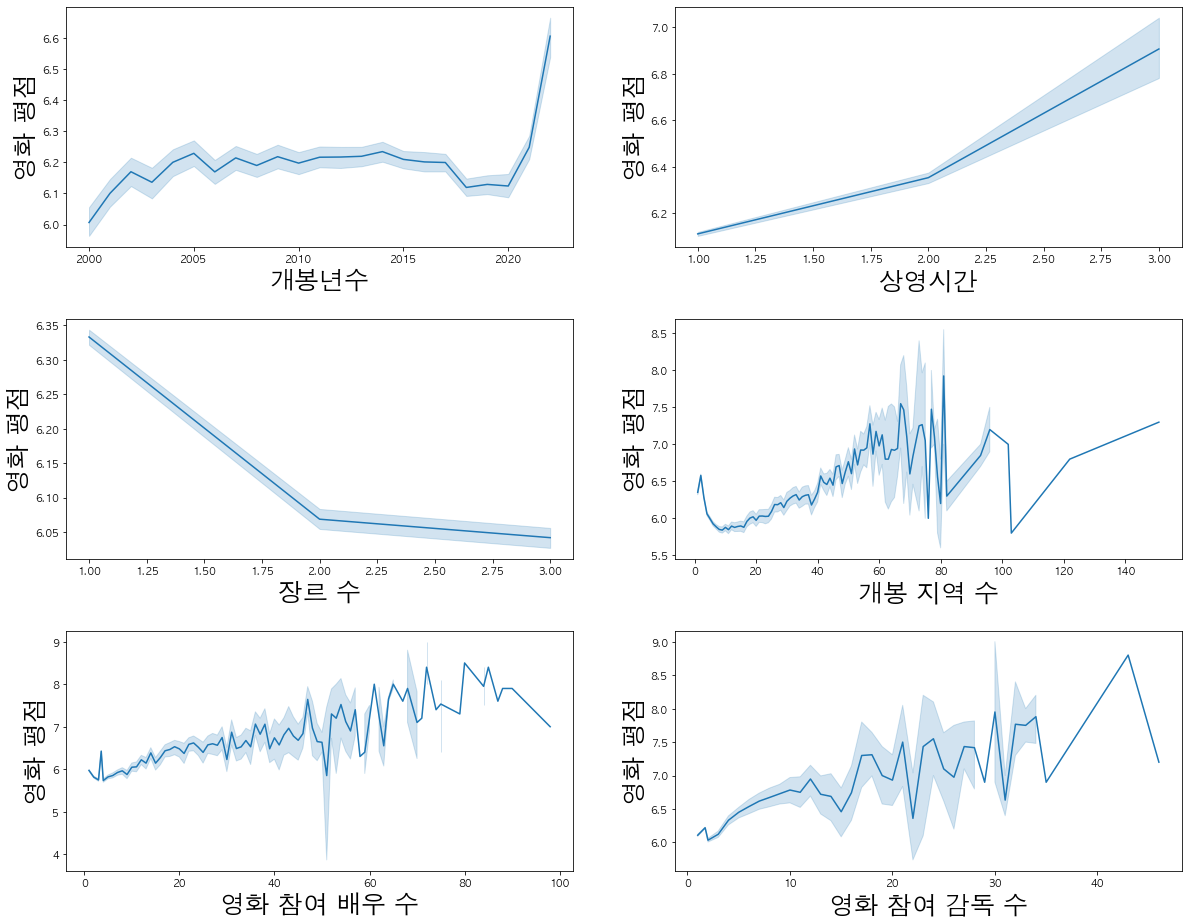

In [179]:
# lineplot을 통한 상관관계 분석
g,ax = plt.subplots(ncols=2, nrows=3,  figsize = (20,15))
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.3)
ax1 = sns.lineplot(x = merged_2['개봉년수'] ,y = merged_2['영화 평점'], ax = ax[0,0])
ax2 = sns.lineplot(x = merged_edit_run4['상영시간'] ,y = merged_edit_run4['영화 평점'], ax = ax[0,1])
ax3 = sns.lineplot(x = merged_2['장르 수'] ,y = merged_2['영화 평점'], ax = ax[1,0])
ax4 = sns.lineplot(x = merged_2['개봉 지역 수'] ,y = merged_2['영화 평점'], ax = ax[1,1])
ax5 = sns.lineplot(x = merged_2['영화 참여 배우 수'] ,y = merged_2['영화 평점'], ax = ax[2,0])
ax6 = sns.lineplot(x = merged_2['영화 참여 감독 수'] ,y = merged_2['영화 평점'], ax = ax[2,1])
plt.show()

1. 2020년 전 영화에서는 개봉년수에 따라 평점의 상관관계 뚜렷하지 않았지만, 2020년 이후 개봉된 작업품들의 평점이 비교적 높게 상승한 것을 확인할 수 있었다.
2. 장르 수는 최소 1개에서 3개까지 확인이 되었으며, 한 영화에 장르가 2개 이상 포함될 경우, 오히려 평점이 떨어지는 것을 확인할 수 있었다.
- 다양한 장르의 이야기를 잘 풀어낼 경우 더 높은 평점을 가질 것으로 가설을 세웠지만, 실제로는 더 낮은 것을 확인할 수 있었다.
3. 상영시간이 늘어남에 따라, 평점과 양의 상관관계를 보이는 것을 확인할 수 있었다.
4. 15-60개 지역에 개봉을 할 경우, 개봉 지역 수가 늘어남에 따라 영화 평점과 양의 상관관계를 보였지만, 그 이후로부터는 유의한 관계를 찾기 어려웠다.
5. 영화 참여 배우 수와 영화 평점은 양의 상관관계를 확인할 수 있었다.
6. 감독이 1명에서 10까지 참여하는 경우에는, 참여하는 감독 수에 따라 영화 평점이 증가하는 것을 확인할 수 있었다.

### 감독 관련 데이터가 영화 평점에 미치는 요인 분석

In [147]:
# 상관관계 및 p-value
print(sp.stats.pearsonr(merged_2['감독 참여 영화 수'], merged_2['영화 평점']))
print(sp.stats.pearsonr(merged_2['감독 참여 티비 수'], merged_2['영화 평점']))
print(sp.stats.pearsonr(merged_2['감독 참여 영화 득표 수'], merged_2['영화 평점']))
print(sp.stats.pearsonr(merged_2['감독 참여 영화 평균 득표 수'], merged_2['영화 평점']))
print(sp.stats.pearsonr(merged_2['감독 참여 영화 평균 평점'], merged_2['영화 평점']))

(-0.061445569570318326, 1.519814783556295e-117)
(-0.014998562753871214, 1.8980439510167384e-08)
(0.03354417959156058, 2.9252062170180837e-36)
(0.04263823354399428, 1.5997657067378727e-57)
(0.03342133983624775, 5.234463831768707e-36)


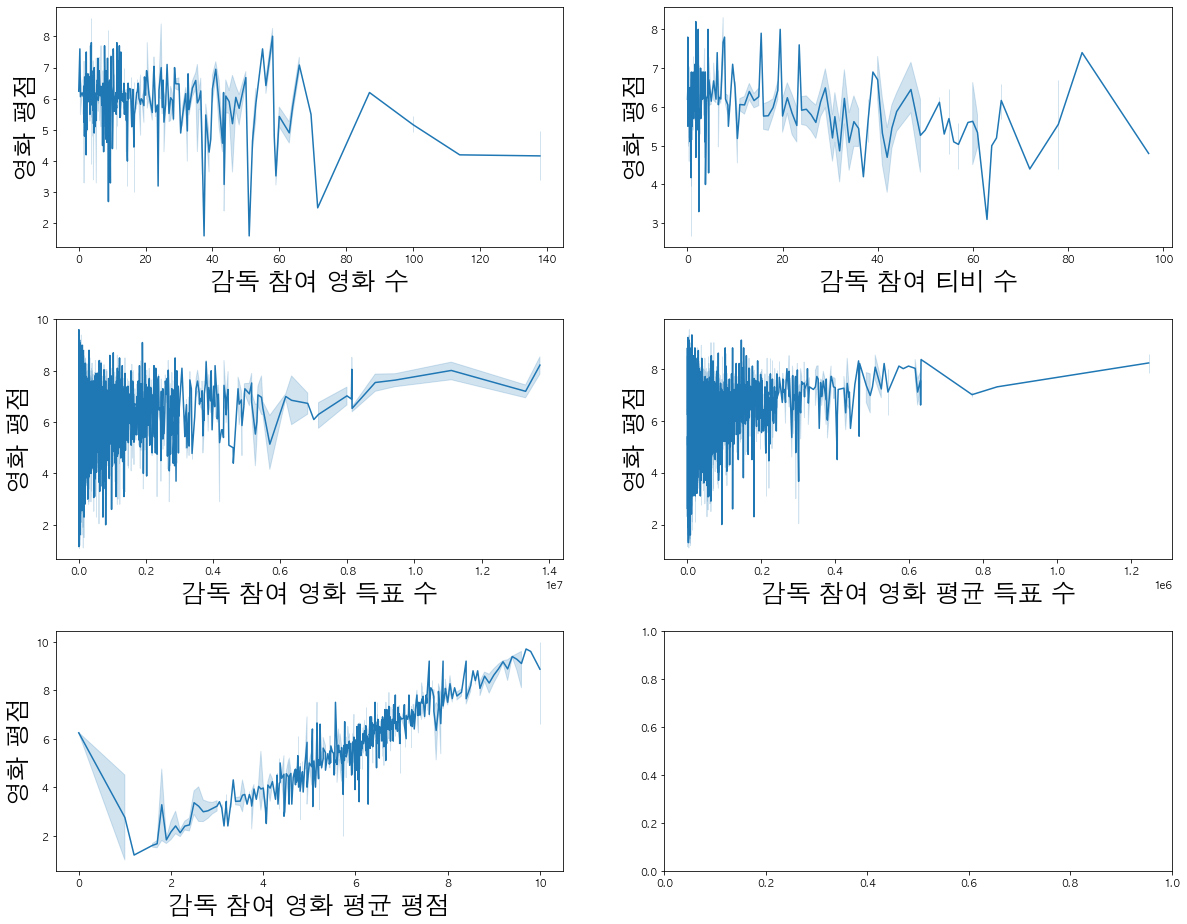

In [148]:
# lineplot을 통한 상관관계 분석
g,ax = plt.subplots(ncols=2, nrows=3,  figsize = (20,15))
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.3)
ax7 = sns.lineplot(x = merged_2['감독 참여 영화 수'] ,y = merged_2['영화 평점'], ax = ax[0,0])
ax8 = sns.lineplot(x = merged_2['감독 참여 티비 수'] ,y = merged_2['영화 평점'], ax = ax[0,1])
ax9 = sns.lineplot(x = merged_2['감독 참여 영화 득표 수'] ,y = merged_2['영화 평점'], ax = ax[1,0])
ax10 = sns.lineplot(x = merged_2['감독 참여 영화 평균 득표 수'] ,y = merged_2['영화 평점'], ax = ax[1,1])
ax11 = sns.lineplot(x = merged_2['감독 참여 영화 평균 평점'] ,y = merged_2['영화 평점'], ax = ax[2,0])
plt.show()

- 영화의 감독이 많은 영화 작업에 참여했다 하더라도 높은 평점을 보장할 수 없다는 것을 확인할 수 있었다.
- 영화의 감독이 많은 티비 작업에 참여했다 하더라도 높은 평점을 보장할 수 없다는 것을 확인할 수 있었다.
- 영화의 감독이 많은 평가를 받은 작업에 참여한 경우, 일정 수치까지는 평점과 유의한 관계를 찾기 힘들었지만, 일정 득표 수 이상을 받은 영화에 참여한 감독은 비교적 높은 평점을 보장할 수 있는 것을 확인할 수 있었다.

- 감독이 참여한 영화가 평균적으로 높은 평점을 받은 경우, 그 감독이 참여하는 영화들은 높은 평점을 이어지는 상관관계를 찾을 수 있었다.

- 영화의 감독이 많은 평가를 받은 작업에 참여한 경우, 일정 수치까지는 평점과 유의한 관계를 찾기 힘들었지만, 일정 득표 수 이상을 받은 영화에 참여한 감독은 비교적 높은 평점을 보장할 수 있는 것을 확인할 수 있었다.

- 감독이 참여한 영화가 평균적으로 높은 평점을 받은 경우, 그 감독이 참여하는 영화들은 높은 평점을 이어지는 상관관계를 찾을 수 있었다.
- 감독이 과거 참여한 영화의 평균 평점이 낮더나 높더라도 그 다음 작품에서 꼭 그 평점이 보장되는 것은 아니었다.
- 하지만 8점 이상의 감독은 8점대를 유지하였다.

### 리뷰 관련 데이터(영화 득표 수)가 영화 평점에 미치는 요인 분석

In [149]:
# 상관관계 및 p-value
print(sp.stats.pearsonr(merged_2['영화 득표 수'], merged_2['영화 평점']))

(0.05985307853533089, 1.275595524505335e-111)


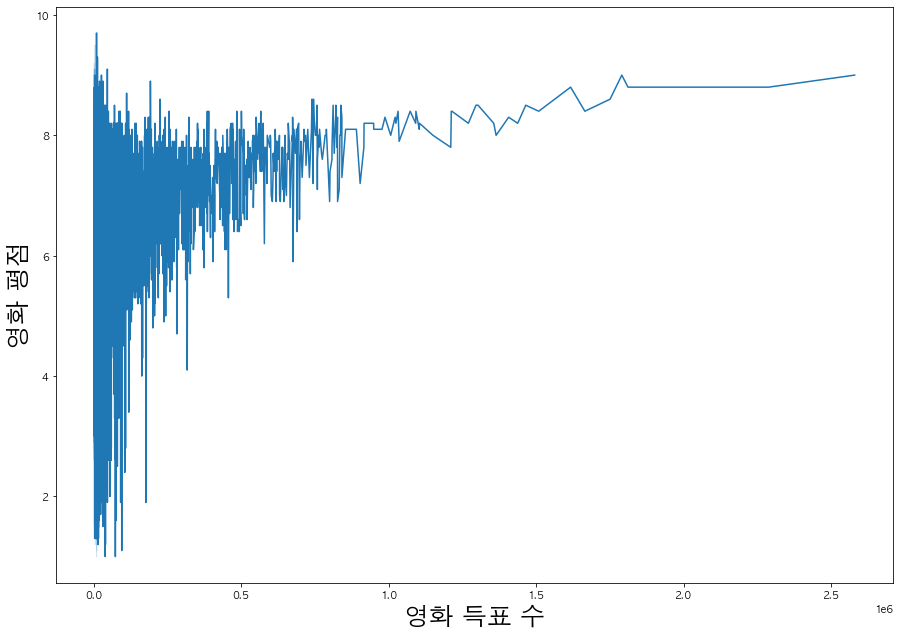

In [180]:
# lineplot을 통한 상관관계 분석
g,ax = plt.subplots(nrows=1,  figsize = (15,10))
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.3)
ax9 = sns.lineplot(x = merged_2['영화 득표 수'] ,y = merged_2['영화 평점'])
plt.show()

- 영화의 득표 수가 일정 수치를 넘어가는 이후부터는 평점이 비교적 높은 위치에 안정적으로 들어오는 것을 확인할 수 있었습니다.


### 범주형 데이터(성인물, 박스오피스 여부)가 영화 평점에 미치는 요인 분석

In [186]:
# 상관관계 및 p-value, 범주형이라 카이제곱을 수행해야 하지만 시간 내에 코드를 찾지 못함
print(sp.stats.pearsonr(merged_2['성인물 여부'], merged_2['영화 평점']))
print(sp.stats.pearsonr(merged_2['박스오피스 여부'], merged_2['영화 평점']))

(-0.012757119381455436, 1.7447659152869215e-06)
(0.013382690947778842, 5.29219392249594e-07)


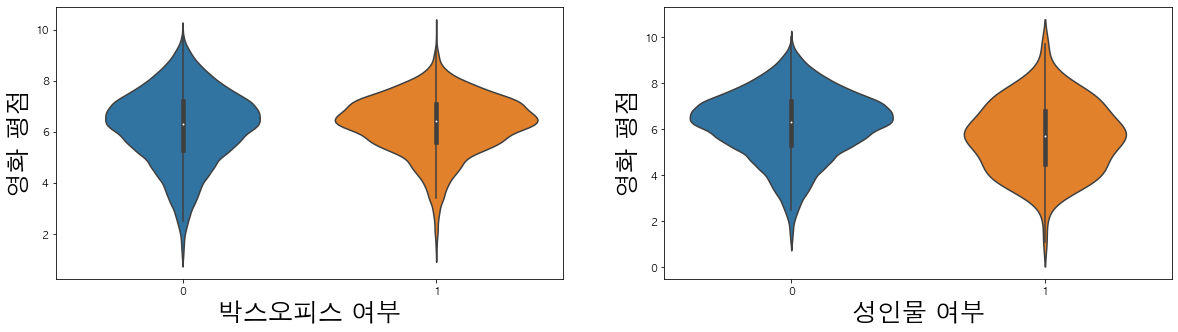

In [152]:
# 범주형 데이터의 violin plot 분석
fig,ax = plt.subplots(ncols = 2,  figsize = (20,5))
ax12 = sns.violinplot(data = merged_2, x = "박스오피스 여부", y = "영화 평점", ax=ax[0])
ax13 = sns.violinplot(data = merged_2, x = "성인물 여부", y = "영화 평점",  ax = ax[1])
plt.show()

- 박스오피스 200위에 올랐던 영화인 경우 평점 6-7점대의 분포가 늘어나 많이 몰려있었으며, 그 이상 혹은 이하의 평점대의 분포는 감소한 것을 확인할 수 있었다.
 - 호불호가 적고 대중성이 강한 영화가 박스오피스 200위에 오른다는 결과를 유추할 수 있었다.

- 성인물 영화의 경우 평점 분포가 더욱 넓은 것을 보아 성인물이 아닌 콘텐츠에 비해 호불호가 강하다는 것알 수 있었다.

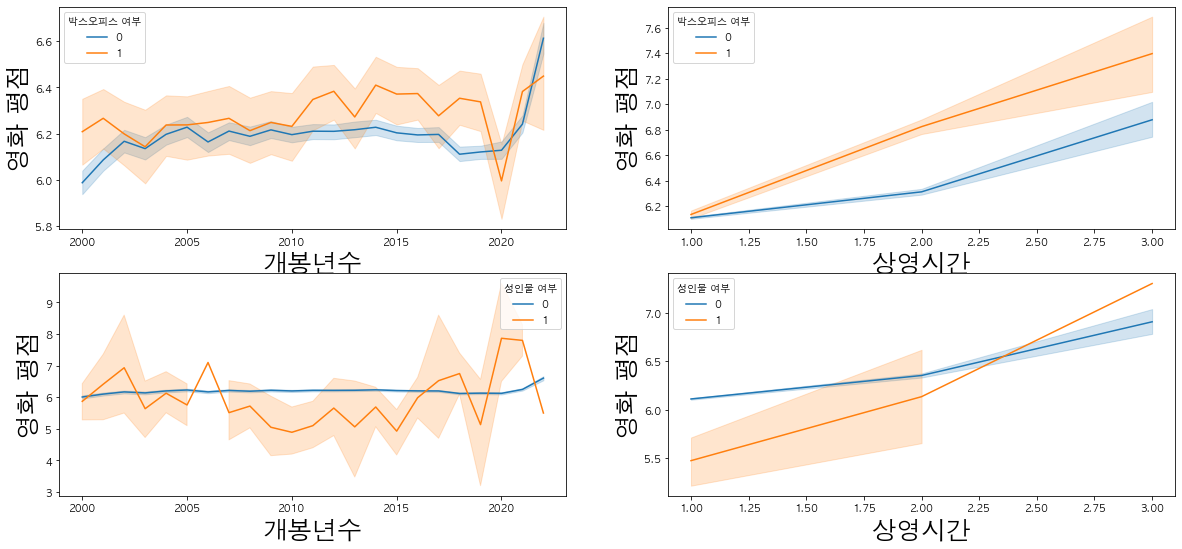

In [161]:
g,ax = plt.subplots(nrows = 2,ncols=2, figsize = (20,9))

ax1 = sns.lineplot(x = merged_2['개봉년수'] ,y = merged_2['영화 평점'], hue = merged_2['박스오피스 여부'], ax = ax[0,0])
ax2 = sns.lineplot(x = merged_edit_run4['상영시간'] ,y = merged_edit_run4['영화 평점'], hue = merged_edit_run4['박스오피스 여부'], ax = ax[0,1])

ax3 = sns.lineplot(x = merged_2['개봉년수'] ,y = merged_2['영화 평점'],hue = merged_2['성인물 여부'], ax = ax[1,0])
ax4 = sns.lineplot(x = merged_edit_run4['상영시간'] ,y = merged_edit_run4['영화 평점'],hue = merged_edit_run4['성인물 여부'], ax = ax[1,1])
plt.show()

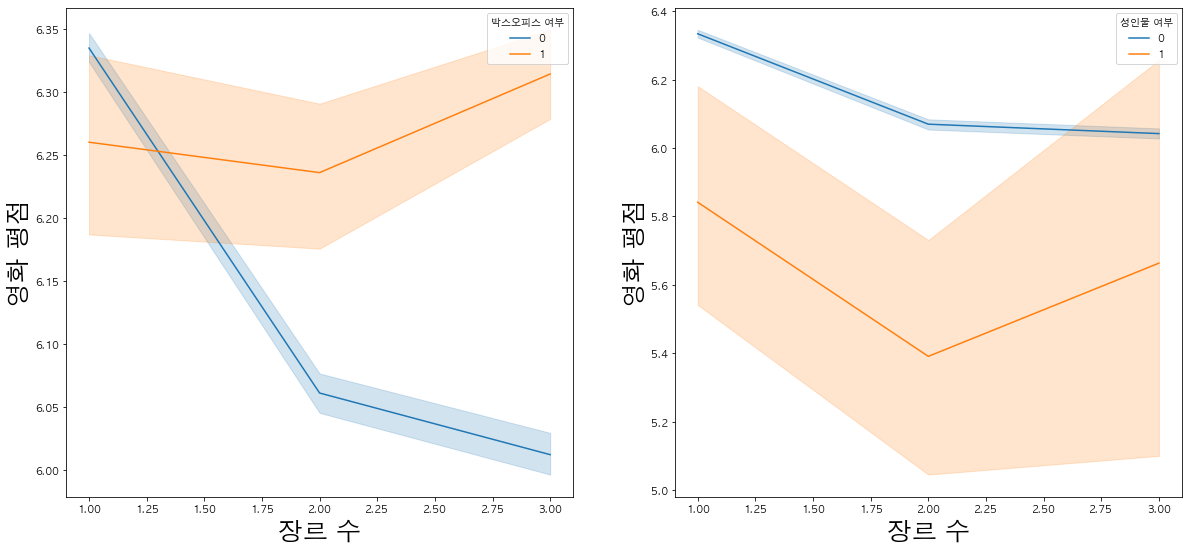

In [164]:
g,ax = plt.subplots(ncols=2, figsize = (20,9))

ax1 = sns.lineplot(x = merged_2['장르 수'] ,y = merged_2['영화 평점'], hue = merged_2['박스오피스 여부'], ax = ax[0])
ax2 = sns.lineplot(x = merged_2['장르 수'] ,y = merged_2['영화 평점'], hue = merged_2['성인물 여부'], ax = ax[1])
plt.show()

- hue를 추가하였을 때, 박스오피스 및 성인물여부에 따라 평점이 달라지는 경우를 확인할 수 있었다.
- 실제 개봉년수에 따른 평점 그래프에서, 성인물의 경우 평점의 등락이 성인물이 아닌 콘텐츠에 비해 심한 것을 확인할 수 있었다.

- 또한, 다양한 장르가 하나의 영화에 포함된 경우, 박스오피스 200위에 등재되었던 콘텐츠는 평점이 증가하는 것을 볼 수 있었고, 그 반대의 경우 낮아지는 것을 확인할 수 있었다.
 - 다양한 장르를 이야기에 잘 풀어낼 경우 더 높은 평점을 가질 것으로 세웠던 가설을 미루어 보아, 박스오피스 200위에 등재된 작품을 이를 잘 풀어내어 평점으로 이어지는 결과를 낳았고, 반대의 경우 스토리가 산으로 간 것으로 추론할 수 있었다.
- 성인물의 경우 장르 수가 2개를 넘어가며 평점이 상승하는 것을 확인하였다

# 결과

영화 콘텐츠에 대한 관심으로 좋은 평가를 받는 영화는 어떤 이유로 관람객에게 좋은 평가를 받고 세계적으로 인기를 얻는지 분석해보고자 하였다.<br>
세계 최대 영화 평점 사이트인 IMDb 내 영화평점에 영향을 주는 요소로 영화 콘텐츠 자체의 특징, 감독의 경험과 평판, 영화 평판 분석해보았으며,<br>
아웃라이어를 제거한 후 모든 요소에서 0.05 이하의 p-value값을 확인할 수 있었다.<br>
가장 눈에 띄었던 요소로 영화 참여 배우수와 감독수, 감독의 과거 영화 평가, 장르 수를 꼽을 수 있는데<br>
영화 참여 배우수, 감독 수 , 과거 영화 평가 점수가 높을 수록 평점도 좋아지는 것(양의 상관관계)을 확인할 수 있었고,<br>
장르수는 적을 수록 평점이 좋아지는 모습을 (음의 상관관계) 확인할 수 있었다.